In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Выбрать свою картинку, из нее вырезать какую-то область. Эту область отобразить либо вертикально, либо горизонтально, либо по обоим напр и вставить обратно в исходный кадр и отобразить его, и сохранить результат

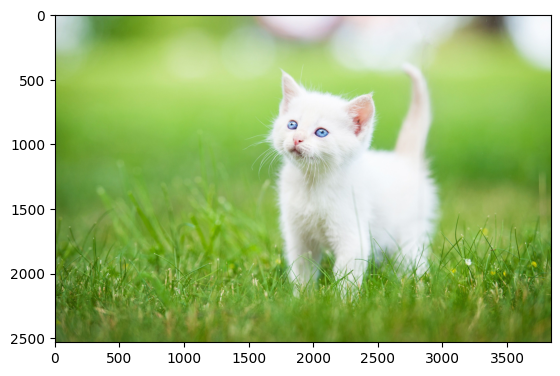

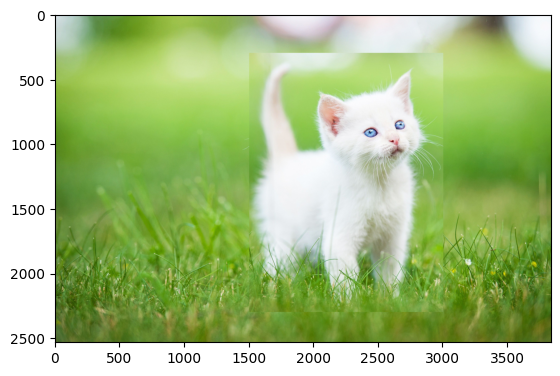

In [18]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/OAD/cat.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

crop_area = (1500, 300, 3000, 2300)  # (left, upper, right, lower)
cropped_img = img[crop_area[1]:crop_area[3], crop_area[0]:crop_area[2]]
modified_img = cv2.flip(cropped_img, 1)
img[crop_area[1]:crop_area[3], crop_area[0]:crop_area[2]] = modified_img

cv2.imwrite('/content/drive/MyDrive/OAD/cat_1.jpg', img)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

1.1 Нарисовать 10 концентрических кругов на ней

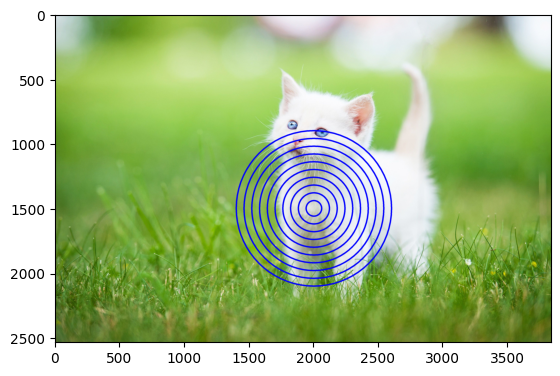

In [19]:
img = cv2.imread('/content/drive/MyDrive/OAD/cat.jpg')

center = (2000, 1500)
radii = [i * 60 for i in range(1, 11)]

for radius in radii:
    cv2.circle(img, center, radius, (255, 0, 0), 10)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

1.2 Нарисовать 10 вложенных прямоугольников на ней

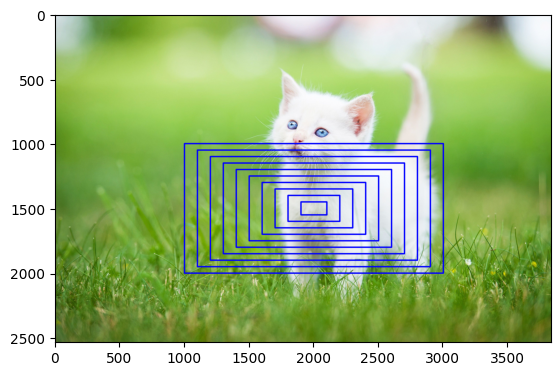

In [20]:
img = cv2.imread('/content/drive/MyDrive/OAD/cat.jpg')

center = (2000, 1500)
sizes = [i * 100 for i in range(1, 11)]

for size in sizes:
    width = size * 2
    height = size

    top_left = (center[0] - width // 2, center[1] - height // 2)
    bottom_right = (center[0] + width // 2, center[1] + height // 2)

    cv2.rectangle(img, top_left, bottom_right, (255, 0, 0), 10)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

2.1 Нарисовать треугольник, в нем вложенный круг, в нем вложенный прямоугольник

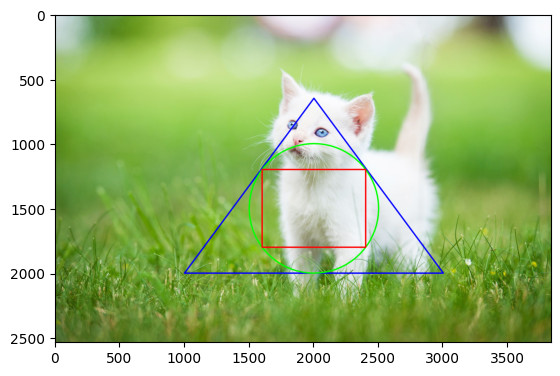

In [21]:
img = cv2.imread('/content/drive/MyDrive/OAD/cat.jpg')

triangle_points = np.array([[2000, 650], [1000, 2000], [3000, 2000]], np.int32)
triangle_points = triangle_points.reshape((-1, 1, 2))
cv2.polylines(img, [triangle_points], isClosed=True, color=(255, 0, 0), thickness=10)

center = (2000, 1500)
radius = 500
cv2.circle(img, center, radius, color=(0, 255, 0), thickness=10)

top_left = (1600, 1200)
bottom_right = (2400, 1800)
cv2.rectangle(img, top_left, bottom_right, color=(0, 0, 255), thickness=10)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

2.2 Нарисовать  круг, в нем вложенный прямоугольник, в нем вложенный треугольник

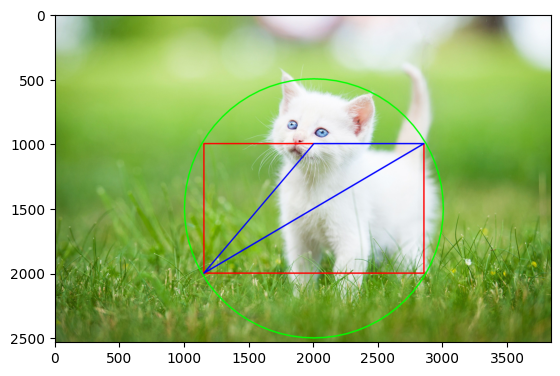

In [22]:
img = cv2.imread('/content/drive/MyDrive/OAD/cat.jpg')

center = (2000, 1500)
radius = 1000
cv2.circle(img, center, radius, color=(0, 255, 0), thickness=10)

top_left = (1150, 2000)
bottom_right = (2850, 1000)
cv2.rectangle(img, top_left, bottom_right, color=(0, 0, 255), thickness=10)

triangle_points = np.array([[1150, 2000], [2000, 1000], [2850, 1000]], np.int32)
triangle_points = triangle_points.reshape((-1, 1, 2))
cv2.polylines(img, [triangle_points], isClosed=True, color=(255, 0, 0), thickness=10)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

2.3 Нарисовать прямоугольник, в нем вложенный круг, в нем вложенный треугольник

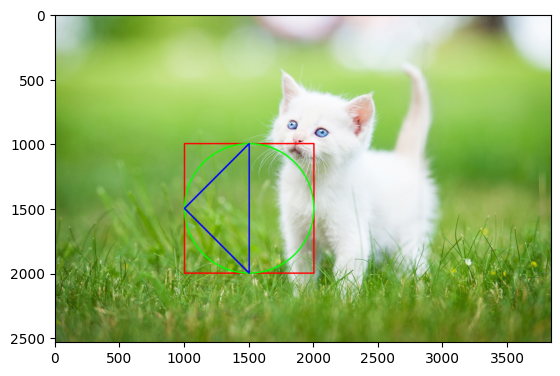

In [23]:
img = cv2.imread('/content/drive/MyDrive/OAD/cat.jpg')

top_left = (1000, 2000)
bottom_right = (2000, 1000)
cv2.rectangle(img, top_left, bottom_right, color=(0, 0, 255), thickness=10)

center = (1500, 1500)
radius = 500
cv2.circle(img, center, radius, color=(0, 255, 0), thickness=10)

triangle_points = np.array([[1500, 2000], [1000, 1500], [1500, 1000]], np.int32)
triangle_points = triangle_points.reshape((-1, 1, 2))
cv2.polylines(img, [triangle_points], isClosed=True, color=(255, 0, 0), thickness=10)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

3.1 Выбрать любую картинку и понизить яркость левой половины картинки и повысить яркость в правой половине картинки

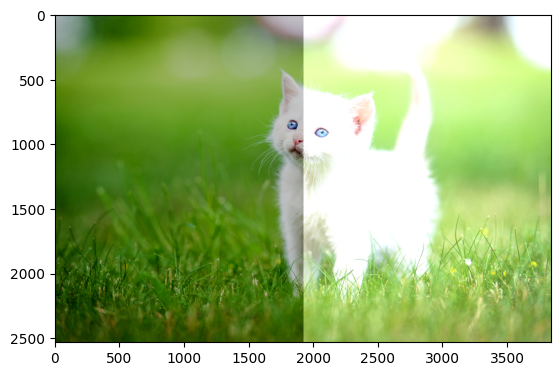

In [24]:
img = cv2.imread('/content/drive/MyDrive/OAD/cat.jpg')

height, width = img.shape[:2]
left_half = img[:, :width // 2]
right_half = img[:, width // 2:]

brightness_matrix = np.ones_like(left_half) * 50
left_half_darker = cv2.subtract(left_half, brightness_matrix)
right_half_brighter = cv2.add(right_half, brightness_matrix)
img = np.hstack((left_half_darker, right_half_brighter))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

3.2 Выбрать любую картинку и понизить контраст верхней половины картинки и повысить контраст в нижней половине картинки

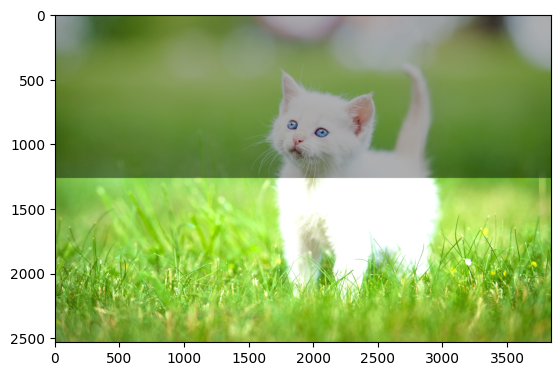

In [25]:
img = cv2.imread('/content/drive/MyDrive/OAD/cat.jpg')

height, width = img.shape[:2]
top_half = img[:height // 2, :]
bottom_half = img[height // 2:, :]

mat_low = np.ones(top_half.shape) * 0.7
mat_high = np.ones(bottom_half.shape) * 1.3
top_half_low_contrast = np.uint8(cv2.multiply(np.float64(top_half), mat_low))
bottom_half_high_contrast = np.uint8(np.clip(cv2.multiply(np.float64(bottom_half), mat_high), 0, 255))

img = np.vstack((top_half_low_contrast, bottom_half_high_contrast))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

4. Выбрать произвольную картинку и бинаризовать ее наилучшим образом, подобрав порог. 5 Вариантов: 1 -  cv.THRESH_BINARY, 2 - cv.THRESH_BINARY_INV, 3 - cv.THRESH_TRUNC, 4 -  cv.THRESH_TOZERO, 5 - cv.THRESH_TOZERO_INV. Номер варианта : номер первой буквы Фамилии % 5 + 1

In [26]:
img = cv2.imread('/content/drive/MyDrive/OAD/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

threshold_value = cv2.threshold(img, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)[0]
print(threshold_value)

124.0


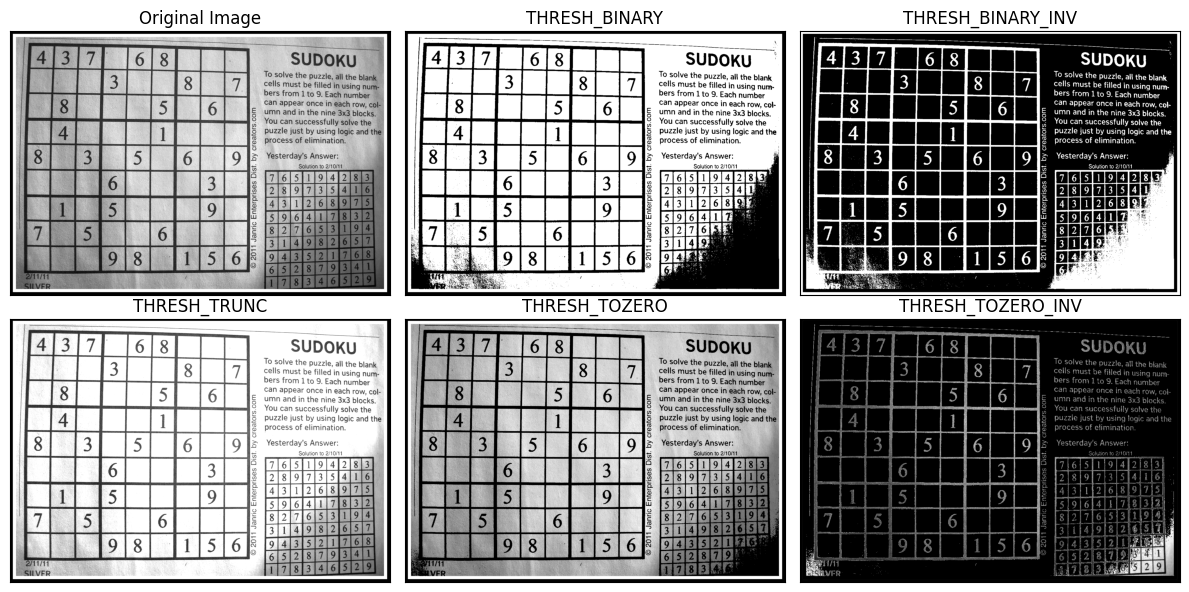

In [27]:
max_value = 255

_, thresh1 = cv2.threshold(img, 127, max_value, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, 127, max_value, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, 170, max_value, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, 100, max_value, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, 100, max_value, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'THRESH_BINARY', 'THRESH_BINARY_INV', 'THRESH_TRUNC', 'THRESH_TOZERO', 'THRESH_TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(12, 6))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

5. Повторить то же самое, только с адаптивным порогом. 2 варианта : 1 - THRESH_BINARY_INV, 2 - THRESH_BINARY. Номер варианта : номер первой буквы Фамилии % 2 + 1

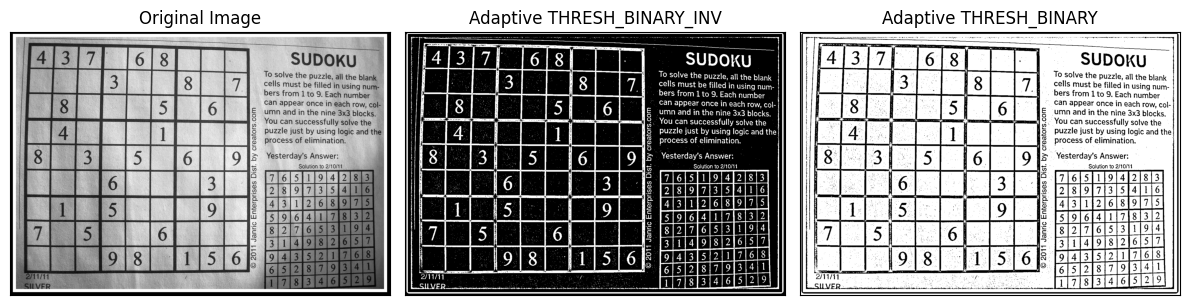

In [28]:
img = cv2.imread('/content/drive/MyDrive/OAD/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

adaptive_thresh_inv = cv2.adaptiveThreshold(img, max_value,
                                             cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY_INV,
                                             31, 25)

adaptive_thresh_binary = cv2.adaptiveThreshold(img, max_value,
                                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                               cv2.THRESH_BINARY,
                                               31, 25)

titles = ['Original Image', 'Adaptive THRESH_BINARY_INV', 'Adaptive THRESH_BINARY']
images = [img, adaptive_thresh_inv, adaptive_thresh_binary]

plt.figure(figsize=(12, 6))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

ДЗ: выбрать произвольный логотип  с надписью больше, чем одного цвета. Подменить в этом логотипе надпись двумя(или более) разными фонами

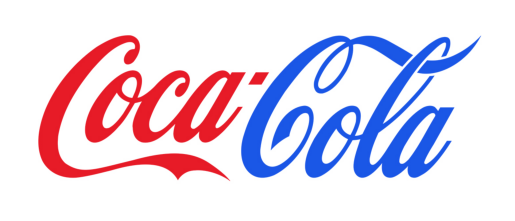

In [29]:
logo = cv2.imread('/content/drive/MyDrive/OAD/cola.jpg')
plt.axis('off')
plt.imshow(cv2.cvtColor(logo, cv2.COLOR_BGR2RGB))

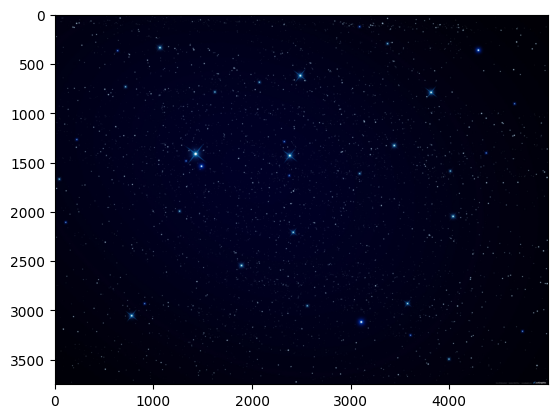

In [33]:
background_0 = cv2.imread('/content/drive/MyDrive/OAD/background_0.jpg')
background_1 = cv2.imread('/content/drive/MyDrive/OAD/background_1.jpg')
plt.imshow(cv2.cvtColor(background_0, cv2.COLOR_BGR2RGB))

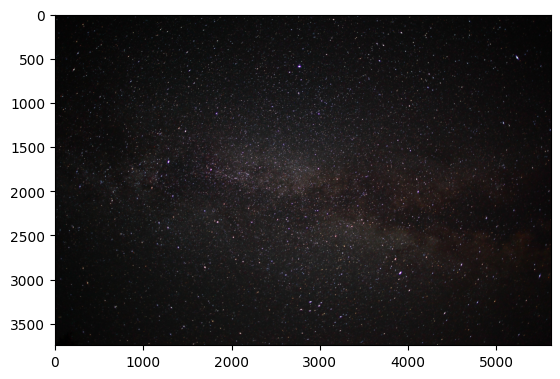

In [32]:
plt.imshow(cv2.cvtColor(background_1, cv2.COLOR_BGR2RGB))

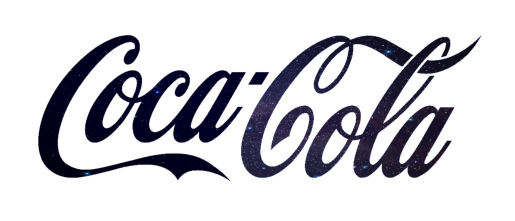

In [34]:
background_0 = cv2.resize(background_0, (logo.shape[1], logo.shape[0]))
background_1 = cv2.resize(background_1, (logo.shape[1], logo.shape[0]))

hsv_logo = cv2.cvtColor(logo, cv2.COLOR_BGR2HSV)

lower_red = np.array([0, 100, 100])
upper_red = np.array([180, 255, 255])
mask_red = cv2.inRange(hsv_logo, lower_red, upper_red)
mask_red_inv = cv2.bitwise_not(mask_red)

lower_blue = np.array([100, 150, 0])
upper_blue = np.array([140, 255, 255])
mask_blue = cv2.inRange(hsv_logo, lower_blue, upper_blue)
mask_blue_inv = cv2.bitwise_not(mask_blue)

img_without_red = cv2.bitwise_and(logo, logo, mask=mask_red_inv)
img_without_blue = cv2.bitwise_and(img_without_red, img_without_red, mask=mask_blue_inv)

background_replaced_red = cv2.bitwise_and(background_0, background_0, mask=mask_red)
background_replaced_blue = cv2.bitwise_and(background_1, background_1, mask=mask_blue)

final_image = cv2.add(img_without_blue, background_replaced_red)
final_image = cv2.add(final_image, background_replaced_blue)

plt.imshow(cv2.cvtColor(final_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()